In [ ]:
!pip install d2l

In [ ]:
!pip install matplotlib==3.0.0

**VGG** (Networks Using Blocks)  
The basic building block of classic CNNs:  
(i) a convolutional layer
with padding to maintain the resolution;  
(ii) a nonlinearity such as a ReLU;  
(iii) a pooling layer such as a maximum pooling layer.


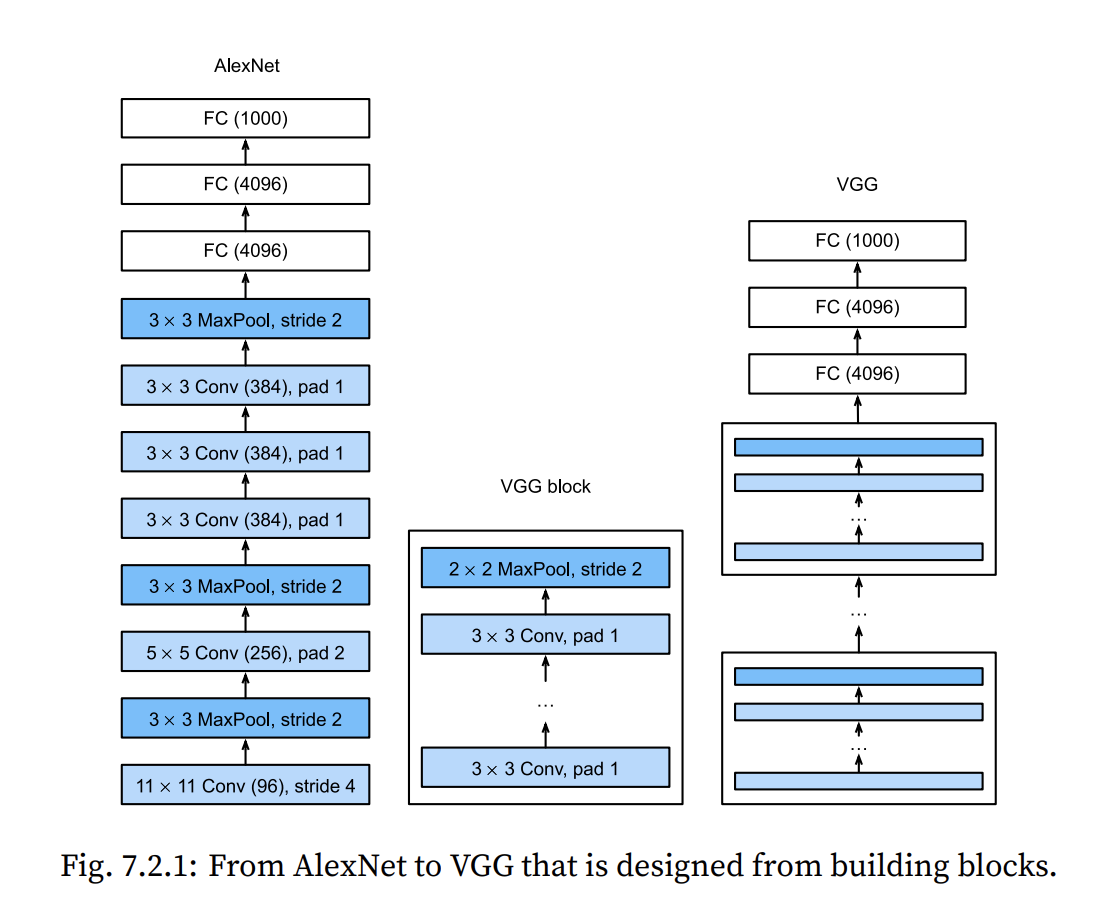

The original VGG network had 5 convolutional blocks, among which the first two have one convolutional layer each and the latter three contain two convolutional layers each. The first block has
64 output channels and each subsequent block doubles the number of output channels, until that
number reaches 512. Since this network uses **8 convolutional layers** and **3 fully-connected layers**,
it is often called **VGG-11**.

In [3]:
import torch
from torch import nn
from d2l import torch as d2l

In [4]:
# define a function to implement one VGG block
def vgg_block(num_convs, in_channels, out_channels):
  layers = []
  for _ in range(num_convs):
    layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
    layers.append(nn.ReLU())
    in_channels = out_channels
  layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
  return nn.Sequential(*layers)

In [5]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512)) # (num_convs, out_channels)

In [7]:
# implement VGG-11
def vgg(conv_arch):
  conv_blks = []
  in_channels = 1

  for (num_convs, out_channels) in conv_arch:
    conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
    in_channels = out_channels

  return nn.Sequential(*conv_blks, nn.Flatten(), 
                       nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(p=0.5),
                       nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(p=0.5),
                       nn.Linear(4096, 10)
                       )

net = vgg(conv_arch)

In [9]:
X = torch.randn((1, 1, 224, 224))
for blk in net:
  X = blk(X)
  print(X.__class__.__name__, 'Output shape:\t', X.shape)

Tensor Output shape:	 torch.Size([1, 64, 112, 112])
Tensor Output shape:	 torch.Size([1, 128, 56, 56])
Tensor Output shape:	 torch.Size([1, 256, 28, 28])
Tensor Output shape:	 torch.Size([1, 512, 14, 14])
Tensor Output shape:	 torch.Size([1, 512, 7, 7])
Tensor Output shape:	 torch.Size([1, 25088])
Tensor Output shape:	 torch.Size([1, 4096])
Tensor Output shape:	 torch.Size([1, 4096])
Tensor Output shape:	 torch.Size([1, 4096])
Tensor Output shape:	 torch.Size([1, 4096])
Tensor Output shape:	 torch.Size([1, 4096])
Tensor Output shape:	 torch.Size([1, 4096])
Tensor Output shape:	 torch.Size([1, 10])


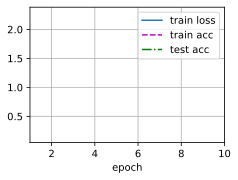

In [ ]:
# Training
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
lr, num_epochs = 0.1, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

**Summary**
1. VGG-11 constructs a network using reusable convolutional blocks. Different VGG models can
be defined by the differences in the number of convolutional layers and output channels in
each block.
2. The use of blocks leads to very **compact representations** of the network definition. It allows
for efficient design of complex networks.
3. In their VGG paper, Simonyan and Ziserman experimented with various architectures. In
particular, they found that **several layers of deep and narrow convolutions (i.e., 3 × 3) **were
more effective than fewer layers of wider convolutions.